In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (4,2)
plt.rcParams['figure.dpi'] = 150

In [4]:
sample = 1000

In [5]:
rolling_mean = lambda N: np.array([1/N if i < N else 0 for i in range(sample)])

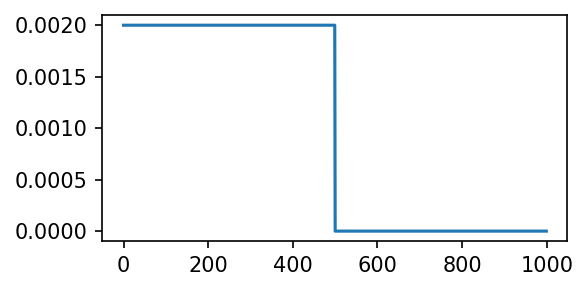

In [6]:
plt.plot(rolling_mean(500))

In [7]:
def spectrum(f: np.array):
    inv_fft = np.fft.fft(f)
    half1_fft, half2_fft = np.split(inv_fft, 2)
    full_fft = np.concatenate([half2_fft, half1_fft])
    return full_fft

In [8]:
def make_pretty(f: np.array):
    half1, half2 = np.split(f, 2)
    nice = np.concatenate([half2, half1])
    return nice

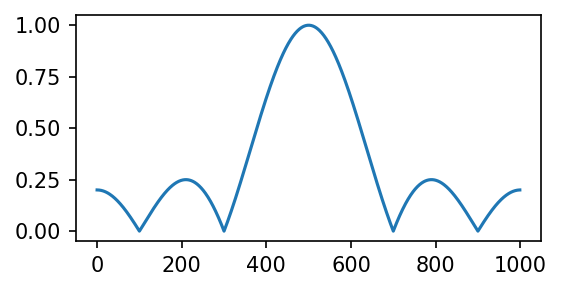

In [9]:
N = 5
full_fft = abs(spectrum(rolling_mean(N)))
plt.plot(full_fft)

/var/folders/_b/f62_3kh151x02tlww4dcpdtr0000gn/T/ipykernel_35610/745588056.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.linspace(-1/N, 1/N, full_fft.size), np.arctan(-np.imag(full_fft) / np.real(full_fft)), '-')


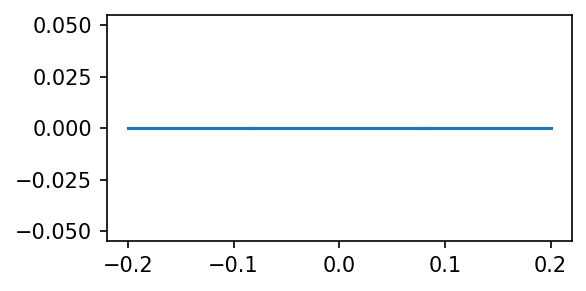

In [10]:
plt.plot(np.linspace(-1/N, 1/N, full_fft.size), np.arctan(-np.imag(full_fft) / np.real(full_fft)), '-')

In [11]:
ts = 1.0 / sample
t = np.arange(0, 1, ts)
freq = 1.
x_sin = np.sin(2 * np.pi * freq * t)

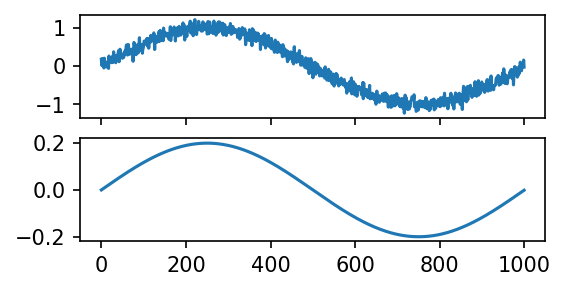

In [12]:
fg, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(x_sin + np.random.normal(0, .1, x_sin.shape))
ax[1].plot(np.real(np.fft.ifft(full_fft * np.fft.fft(x_sin))))

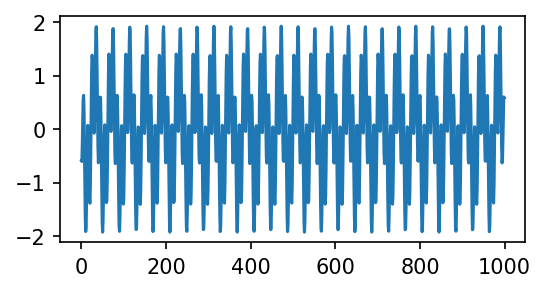

In [13]:
ts = 1.0 / sample
t = np.linspace(-4*np.pi, 4*np.pi, sample)
freq1 = 1.
freq2 = 4.
x_sin1 = np.sin(2 * np.pi * freq1 * t)
x_sin2 = np.sin(2 * np.pi * freq2 * t)
f = x_sin1 + x_sin2
plt.plot(f)

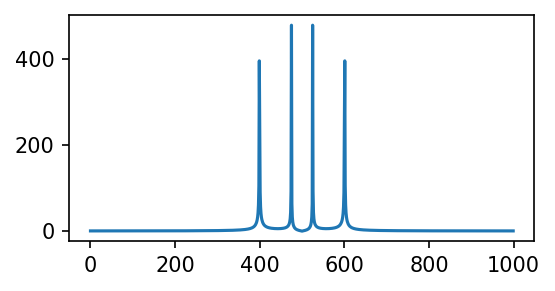

In [14]:
plt.plot(abs(spectrum(f)))

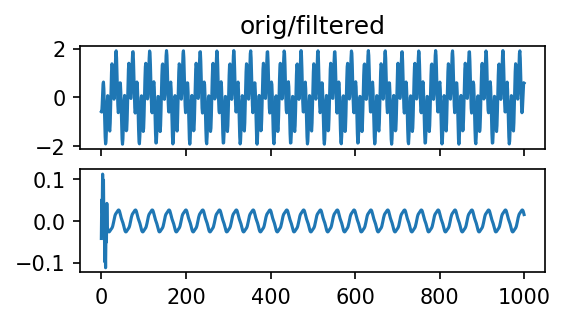

In [15]:
N = 15
fg, ax = plt.subplots(2, 1, sharex=True)
spectre = spectrum(rolling_mean(N))
f_spectre = spectre * np.fft.fft(f)
filtered = np.real(np.fft.ifft(f_spectre))
ax[0].set_title('orig/filtered')
ax[0].plot(f)
ax[1].plot(filtered)

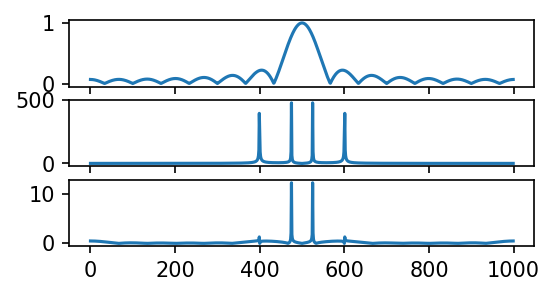

In [16]:
fg, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(np.abs(spectre))
ax[1].plot(np.abs(spectrum(f)))
ax[2].plot(np.abs(spectrum(filtered)))

In [17]:
freq = np.arange(0, sample)

In [18]:
def lpfunction(cut_freq):
    f = np.zeros(int(sample / 2))
    for i in range(int(sample / 2)):
        f[i] = 1 if i < cut_freq else 0
    f2 = f.copy()
    return np.concatenate([f, f2[::-1]])

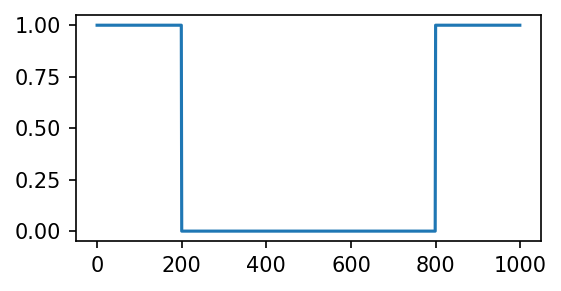

In [19]:
cut_freq = 200
ifs = lpfunction(cut_freq)
plt.plot(ifs)

In [20]:
dom = np.linspace(0, cut_freq, sample)
sinus = np.sin(dom *  np.pi / cut_freq)
cosin = np.cos(dom *  np.pi / cut_freq)
c = lpfunction(cut_freq) * cosin + 1j * lpfunction(cut_freq) * sinus

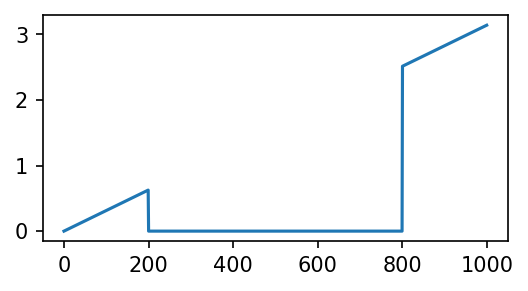

In [21]:
plt.plot(np.angle(c))

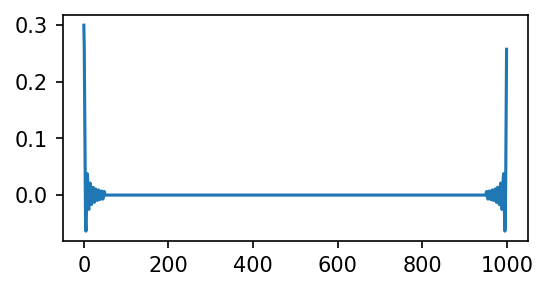

In [22]:
def generate_lpf(cut_freq, cut: int):
    ifs = lpfunction(cut_freq)
    lpf = np.fft.ifft(ifs)
    lpf[(int(sample/2) - cut):int(sample/2)], lpf[int(sample/2):(int(sample/2) + cut)] = 0, 0
    return lpf
plt.plot(np.real(generate_lpf(150, 450)))

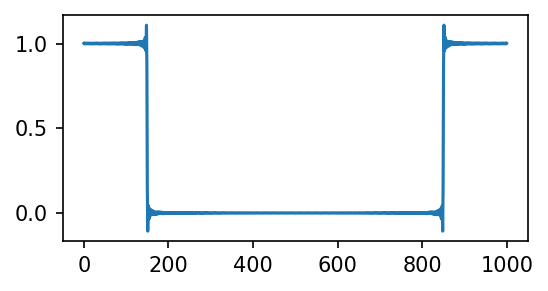

In [23]:
plt.plot(np.real(np.fft.fft(generate_lpf(150, 150))))

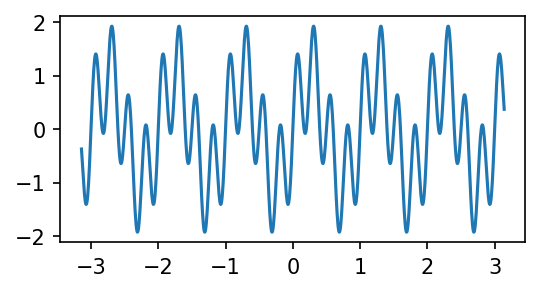

In [24]:
ts = 1.0 / sample
t = np.linspace(-np.pi, np.pi, sample)
freq1 = 1.
freq2 = 4.
x_sin1 = np.sin(2 * np.pi * freq1 * t)
x_sin2 = np.sin(2 * np.pi * freq2 * t)
f = x_sin1 + x_sin2
plt.plot(t, f)

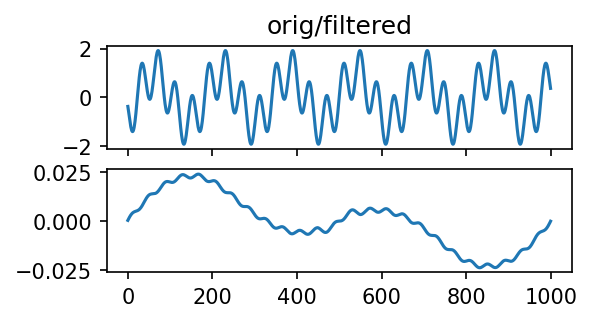

In [25]:
fg, ax = plt.subplots(2, 1, sharex=True)
spectre = np.fft.fft(generate_lpf(2, 50))
f_spectre = spectre * np.fft.fft(f)
filtered = np.real(np.fft.ifft(f_spectre))
ax[0].set_title('orig/filtered')
ax[0].plot(f)
ax[1].plot(filtered)

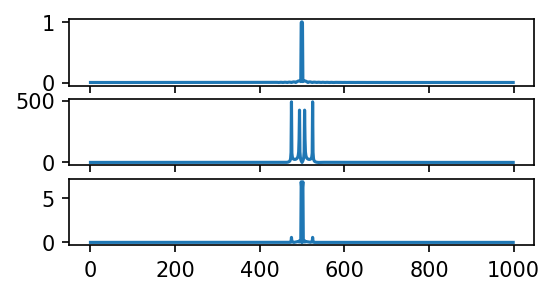

In [26]:
fg, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(make_pretty(abs(spectre)))
ax[1].plot(np.abs(spectrum(f)))
ax[2].plot(np.abs(spectrum(filtered)))

In [27]:
def hpfunction(cut_freq):
    f = np.zeros(int(sample / 2))
    for i in range(int(sample / 2)):
        f[i] = 0 if i < cut_freq else 1
    f2 = f.copy()
    return np.concatenate([f, f2[::-1]])

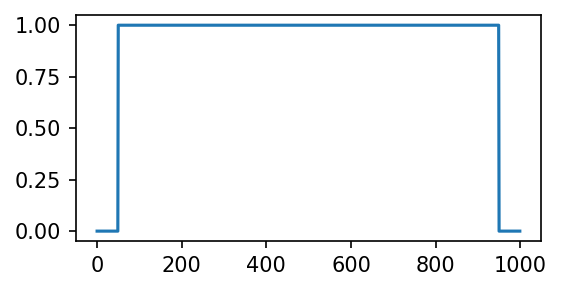

In [28]:
cut_freq = 50
plt.plot(hpfunction(cut_freq))

In [29]:
dom = np.linspace(0, cut_freq, sample)
sinus = np.sin(dom *  np.pi / cut_freq)
cosin = np.cos(dom *  np.pi / cut_freq)
c = hpfunction(cut_freq) * cosin + 1j * hpfunction(cut_freq) * sinus

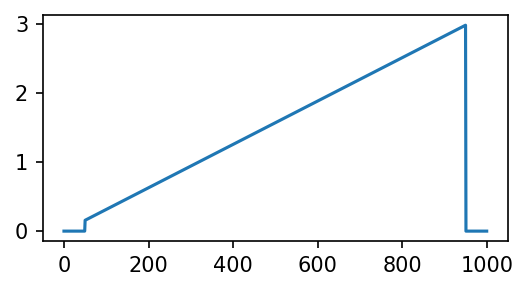

In [30]:
plt.plot(np.angle(c))

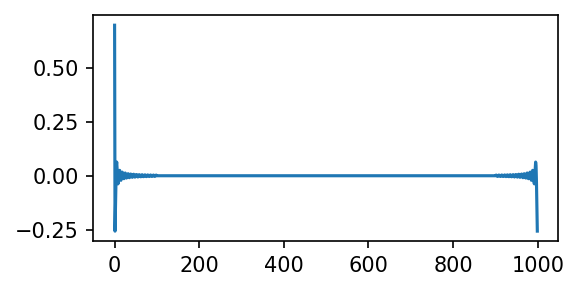

In [31]:
def generate_hpf(cut_freq, cut: int):
    ifs = hpfunction(cut_freq)
    hpf = np.fft.ifft(ifs)
    hpf[(int(sample/2) - cut):int(sample/2)], hpf[int(sample/2):(int(sample/2) + cut)] = 0, 0
    return hpf
plt.plot(np.real(generate_hpf(150, 400)))

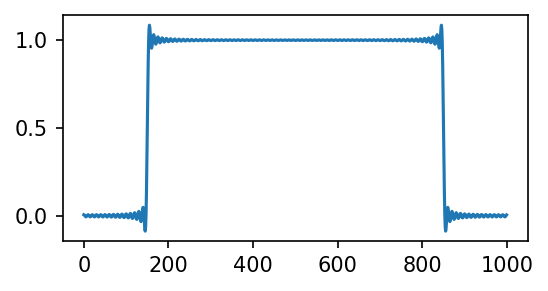

In [32]:
plt.plot(np.real(np.fft.fft(np.real(generate_hpf(150, 400)))))

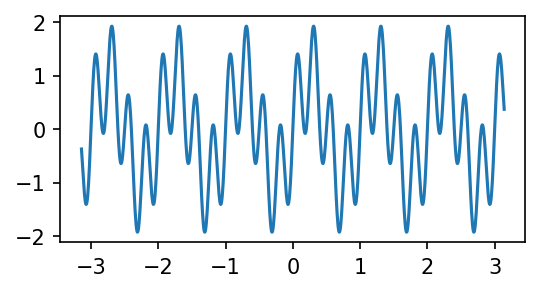

In [33]:
ts = 1.0 / sample
t = np.linspace(-np.pi, np.pi, sample)
freq1 = 1.
freq2 = 4.
x_sin1 = np.sin(2 * np.pi * freq1 * t)
x_sin2 = np.sin(2 * np.pi * freq2 * t)
f = x_sin1 + x_sin2
plt.plot(t, f)

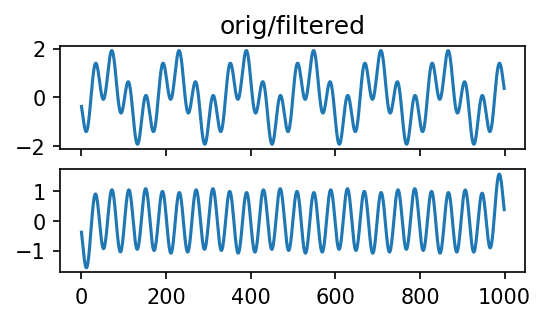

In [34]:
fg, ax = plt.subplots(2, 1, sharex=True)
spectre = np.fft.fft(generate_hpf(10, 400))
f_spectre = spectre * np.fft.fft(f)
filtered = np.real(np.fft.ifft(f_spectre))
ax[0].set_title('orig/filtered')
ax[0].plot(f)
ax[1].plot(filtered)

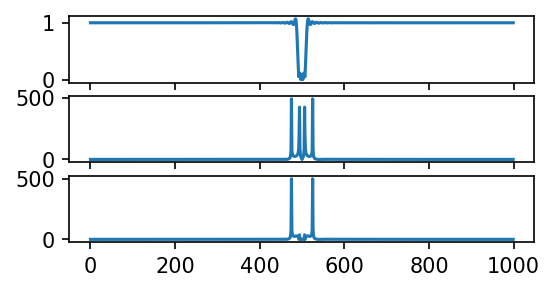

In [35]:
fg, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(make_pretty(np.abs((spectre))))
ax[1].plot(np.abs(spectrum(f)))
ax[2].plot(np.abs(spectrum(filtered)))

# Второй способ

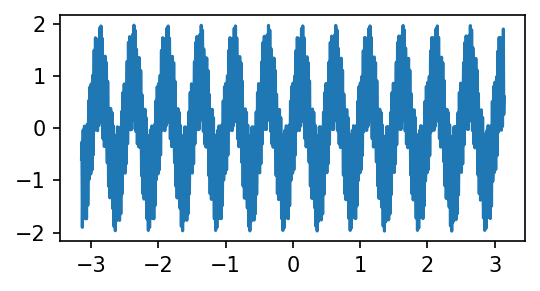

In [116]:
ts = 1.0 / sample
t = np.linspace(-np.pi, np.pi, sample)
freq1 = 2.
freq2 = 49.
x_sin1 = np.sin(2 * np.pi * freq1 * t)
x_sin2 = np.sin(2 * np.pi * freq2 * t)
f = x_sin1 + x_sin2
plt.plot(t, f)

## С помощью ФНЧ

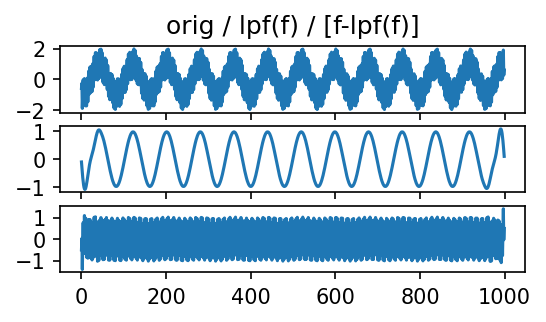

In [117]:
fg, ax = plt.subplots(3, 1, sharex=True)
spectre = np.fft.fft(generate_lpf(50, 450)) # low pass filter
f_spectre = spectre * np.fft.fft(f)
filtered_lpf = np.real(np.fft.ifft(f_spectre))
ax[0].set_title('orig / lpf(f) / [f-lpf(f)]')
ax[0].plot(f)
ax[1].plot(filtered_lpf)
ax[2].plot(f - filtered_lpf)

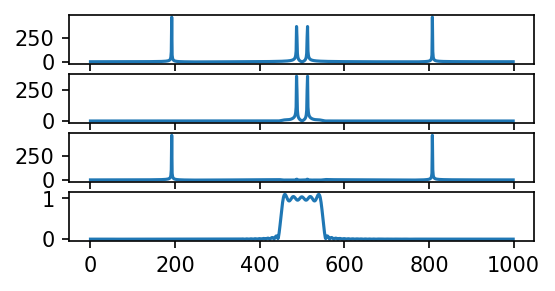

In [118]:
fg, ax = plt.subplots(4, 1, sharex=True)
ax[0].plot(make_pretty(np.abs(np.fft.fft(f))))
ax[1].plot(make_pretty(np.abs(np.fft.fft(filtered_lpf))))
ax[2].plot(make_pretty(np.abs(np.fft.fft(f - filtered_lpf))))
ax[3].plot(make_pretty(np.abs(spectre)))

## Полосовой фильтр

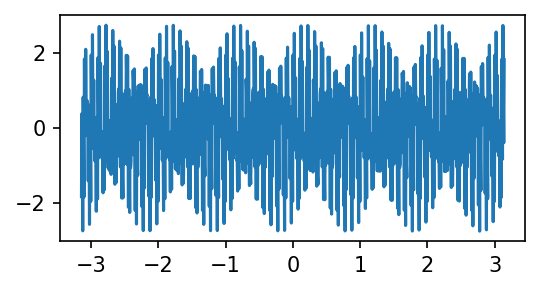

In [89]:
t = np.linspace(-np.pi, np.pi, sample)
freq1 = 10.
freq2 = 50.
freq3 = 100
x_sin1 = np.sin(2 * np.pi * freq1 * t)
x_sin2 = np.sin(2 * np.pi * freq2 * t)
x_sin3 = np.sin(2 * np.pi * freq3 * t)
f = x_sin1 + x_sin2 + x_sin3
plt.plot(t, f)

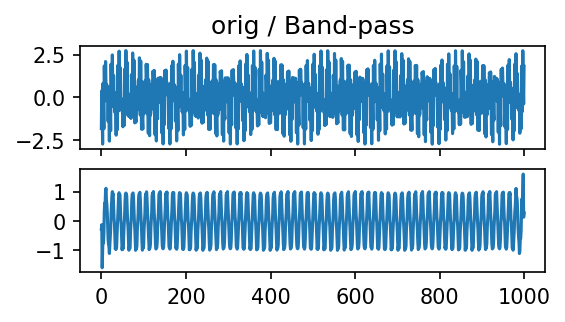

In [104]:
fg, ax = plt.subplots(2, 1, sharex=True)
spectre_lpf = np.fft.fft(generate_lpf(300, 470)) # low pass filter
spectre_hpf = np.fft.fft(generate_hpf(400, 470)) # high pass filter
band_pass = spectre_lpf + spectre_hpf
f_spectre = band_pass * np.fft.fft(f)
filtered = np.real(np.fft.ifft(f_spectre))
ax[0].set_title('orig / Band-pass')
ax[0].plot(f)
ax[1].plot(filtered)

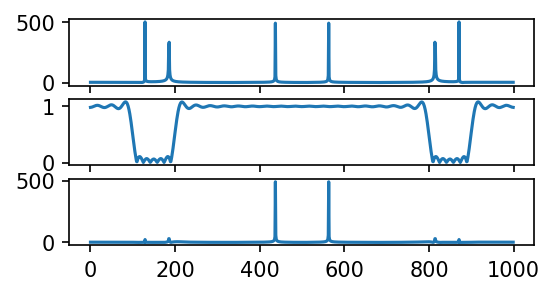

In [105]:
fg, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(make_pretty(np.abs(np.fft.fft(f))))
ax[1].plot(make_pretty(np.abs(band_pass)))
ax[2].plot(make_pretty(np.abs(np.fft.fft(filtered))))

## Режекторный

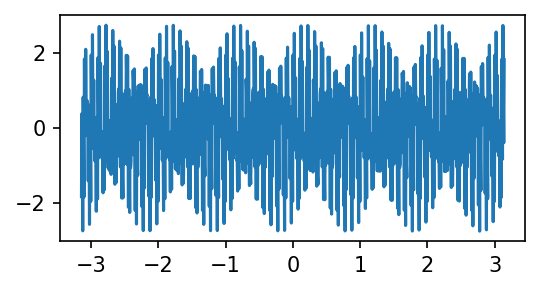

In [106]:
t = np.linspace(-np.pi, np.pi, sample)
freq1 = 10.
freq2 = 50.
freq3 = 100
x_sin1 = np.sin(2 * np.pi * freq1 * t)
x_sin2 = np.sin(2 * np.pi * freq2 * t)
x_sin3 = np.sin(2 * np.pi * freq3 * t)
f = x_sin1 + x_sin2 + x_sin3
plt.plot(t, f)

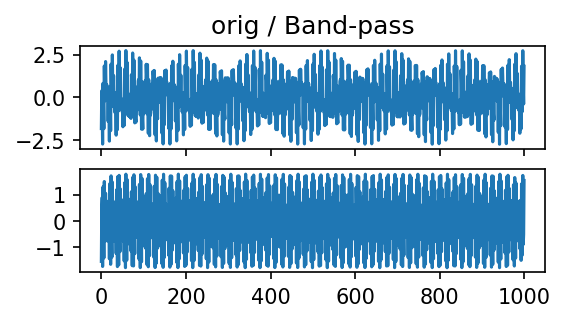

In [109]:
fg, ax = plt.subplots(2, 1, sharex=True)
spectre_lpf = np.fft.fft(generate_lpf(300, 470)) # low pass filter
spectre_hpf = np.fft.fft(generate_hpf(400, 470)) # high pass filter
band_pass = spectre_lpf + spectre_hpf
f_spectre = band_pass * np.fft.fft(f)
filtered = np.real(f - np.fft.ifft(f_spectre))
ax[0].set_title('orig / Band-pass')
ax[0].plot(f)
ax[1].plot(filtered)

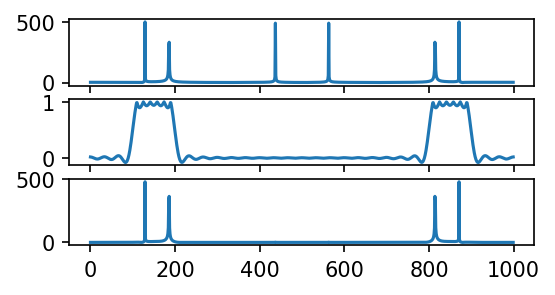

In [112]:
fg, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(make_pretty(np.abs(np.fft.fft(f))))
ax[1].plot(make_pretty(1 - np.abs(band_pass)))
ax[2].plot(make_pretty(np.abs(np.fft.fft(filtered))))